# Final Part B - Minh Nguyen 2069407

## Task 1
1. To segment the objects from the background in the image, I would use a supervised method, because all the objects in the image are of the same "coins" type, but they are different in size, color, and the printed objects on them. Supervised method can help separate the coins into different classes, as they hold different values, history, etc. Unsupervised methods might just segment the coins into the same class since they are all coins, which would not be useful for this task.

In [4]:
# Segment the input image
!python segment_image.py -i inputs/coins.jpg -o outputs/coins_seg.png -m deeplabv3

Using CPU
USING DEEPLABV3 WITH MOBILENETV3 BACKBONE
/Users/ndminh/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ndminh/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Inference time: 2.142s (0.5 FPS)
Saved segmented image to outputs/coins_seg.png


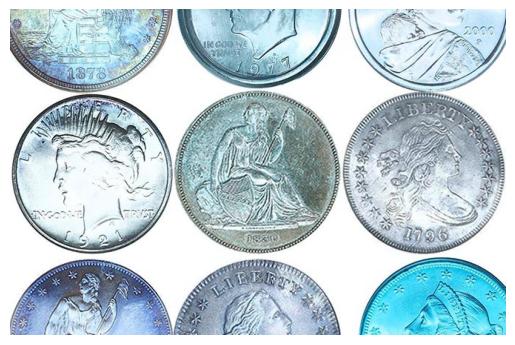

In [ ]:
# show the segmented image with matplotlib
import matplotlib.pyplot as plt
import cv2

segmented_image = cv2.imread("outputs/coins_seg.png")
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

plt.imshow(segmented_image)
plt.axis("off")
plt.show()

## Task 2
- I used YOLO model in this task. You can download the model weights from https://pjreddie.com/media/files/yolov3.weights

In [8]:
import os
from keras.models import load_model

from labels import labels
from yolov3_model import make_yolov3_model
from weight_reader import WeightReader
from utils import (
    decode_netout,
    draw_boxes,
    get_boxes,
    load_image_pixels,
    do_nms,
    correct_yolo_boxes,
)

In [9]:
# make the yolov3 model to predict 80 classes on COCO
yolov3 = make_yolov3_model()

/Users/ndminh/miniconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [10]:
# load the weights trained on COCO into the model

weights_path = 'yolov3.weights'

weight_reader = WeightReader(weights_path)
weight_reader.load_weights(yolov3)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [11]:
# save the model to file
yolov3.save('model.h5')

In [12]:
# load yolov3 model and perform object detection
# based on https://github.com/experiencor/keras-yolo3

# load yolov3 model
model = load_model('model.h5')
# define the expected input shape for the model
input_w, input_h = 416, 416

# inputs folder that contains the image
inputs_folder = 'inputs'

In [13]:
# pipeline
def pipeline(filename, nms_thresh=0.5):
    print("Processing image:", filename)
    # define our new photo
    photo_filename = os.path.join(inputs_folder, filename)

    # load and prepare image
    image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
    # make prediction
    yhat = model.predict(image)
    # summarize the shape of the list of arrays
    print([a.shape for a in yhat])
    # define the anchors
    anchors = [
        [116, 90, 156, 198, 373, 326],
        [30, 61, 62, 45, 59, 119],
        [10, 13, 16, 30, 33, 23],
    ]
    # define the probability threshold for detected objects
    class_threshold = 0.6
    boxes = list()
    for i in range(len(yhat)):
        # decode the output of the network
        boxes += decode_netout(
            yhat[i][0], anchors[i], class_threshold, input_h, input_w
        )
    # correct the sizes of the bounding boxes for the shape of the image
    correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
    # suppress non-maximal boxes
    do_nms(boxes, nms_thresh)

    # get the details of the detected objects
    v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

    # summarize what we found
    for i in range(len(v_boxes)):
        print(v_labels[i], v_scores[i])

    # draw what we found
    draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

Processing image: person.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
person 99.98052716255188


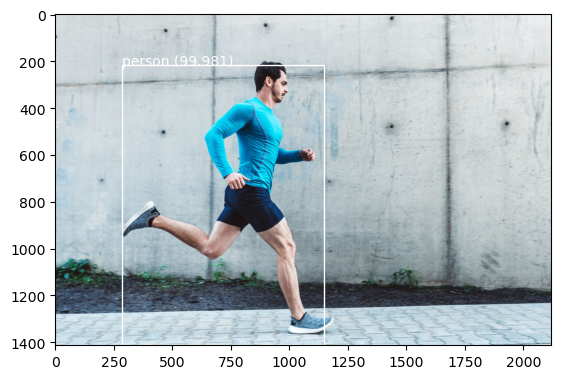

In [15]:
filename = "person.jpg"
pipeline(filename, nms_thresh=0.5)

- I used YOLOv3 model to detect the person's bounding box in the above image. Because it was trained on a large number of images and it can detect a variety of objects. The bounding box was drawn around the person, and the confidence score was also displayed on the image. The model was able to detect the person in the image with a high confidence score (99.98%), which indicates that it is a great model for this task.

### Credits
- The code in this project was based on the Homeworks and some parts were from ChatGPT.